In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


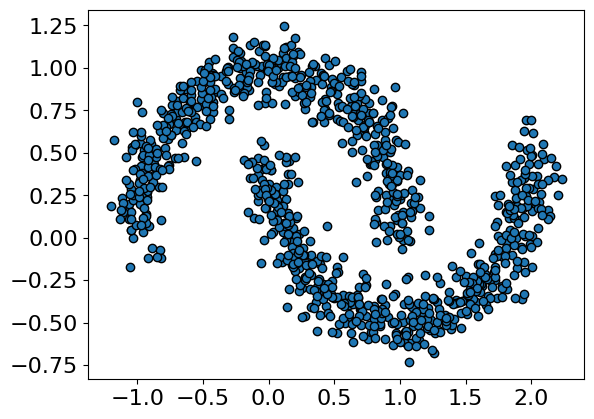

In [ ]:
seed = 13
np.random.seed(seed)
num_points = 1000
X, y = make_moons(n_samples=num_points, noise=0.1, random_state=seed)
plt.scatter(X[:, 0], X[:, 1],  edgecolors='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

In [9]:
# 切分資料：70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("訓練集大小:", X_train.shape)
print("測試集大小:", X_test.shape)

訓練集大小: (700, 2)
測試集大小: (300, 2)


Test Accuracy: 1.0


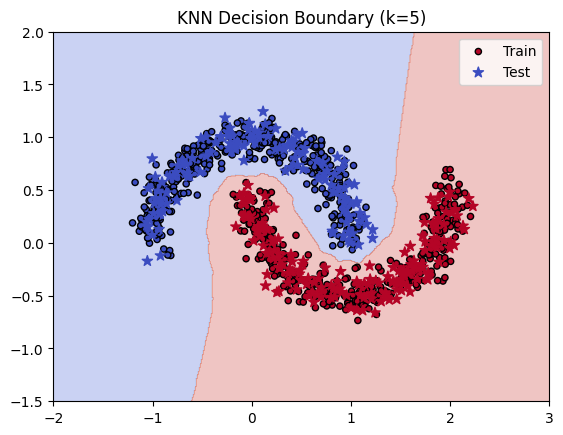

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# 1. 建立 KNN 模型 (k=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# 2. 訓練模型
knn_classifier.fit(X_train, y_train)

# 3. 測試集準確率
print("Test Accuracy:", knn_classifier.score(X_test, y_test))

# 可視化決策邊界
xx, yy = np.meshgrid(np.linspace(-2, 3, 500),
                     np.linspace(-1.5, 2, 500))

Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
            s=20, edgecolor='k', cmap=plt.cm.coolwarm, label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
            s=60, marker='*', cmap=plt.cm.coolwarm, label="Test")
plt.title("KNN Decision Boundary (k=5)")
plt.legend()
plt.show()

